In [16]:
!wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
!unzip A3DS.zip

--2023-06-14 06:00:56--  https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip [following]
--2023-06-14 06:00:56--  https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31636302 (30M) [application/zip]
Saving to: ‘A3DS.zip.1’

A3DS.zip.1          100%[===================>]  30.17M  --.-KB/s    in 0.1s    

2023-06-14 06:00:57 (219 MB/s) - ‘A3DS.zip.1’ save

In [17]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import transformers

In [19]:
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle

import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [20]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.2.crossattention.masked_bias', 'decoder.transformer.h.10.attn.masked_bias', 'decoder.transformer.h.3.attn.masked_bias', 'decoder.transformer.h.10.attn.bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.9.crossattention.bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.0.crossattention.bias', 'decoder.transformer.h.4.crossattention.bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.9.attn.bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.0.attn.masked_bias', 'decoder.transformer.h.1.crossattention.bias', 'decoder.transformer.h.0.crossattention.masked_bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.3.attn.bias', 'decoder.tra

In [21]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

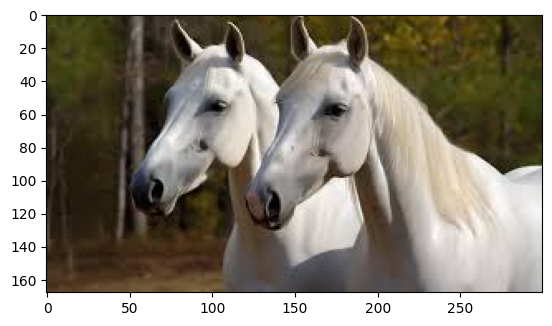

two white horses standing side by side in a field 


In [22]:
def show_n_generate(url, greedy = True, model = model_raw):
    image = Image.open(requests.get(url, stream =True).raw)
    pixel_values   = image_processor(image, return_tensors ="pt").pixel_values
    plt.imshow(np.asarray(image))
    plt.show()

    if greedy:
        generated_ids  = model.generate(pixel_values, max_new_tokens = 30)
    else:
        generated_ids  = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens = 30,
            top_k=5)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9wGWVSrjKGU42AxxEL9kIReL2EIJ9yW_qwA&usqp=CAU"
# url = "https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/pics/06-3DS-example.jpg"
# url = "https://img.welt.de/img/sport/mobile102025155/9292509877-ci102l-w1024/hrubesch-rummenigge-BM-Berlin-Gijon-jpg.jpg"
# url = "https://faroutmagazine.co.uk/static/uploads/2021/09/The-Cover-Uncovered-The-severity-of-Rage-Against-the-Machines-political-message.jpg"
# url = "https://media.npr.org/assets/img/2022/03/13/2ukraine-stamp_custom-30c6e3889c98487086d76869f8ba6a8bfd2fd5a1.jpg"

show_n_generate(url, greedy = False)